In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Difdoug\Difdoug_NL_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.97890,1.83630,2.88660,2.46960,0.21541,3.09000,0.78343,0.51035,0.03043,0.100660
1,0.029389,0.206580,0.48861,1.43430,3.12990,1.27780,1.42850,0.14333,1.19480,2.13180,0.98473,3.844500
2,-1.115400,0.217560,1.61050,1.33710,3.76820,1.21000,3.99630,2.21730,3.90290,1.51440,2.43890,0.633580
3,-0.539160,-0.061874,0.36486,0.33278,0.19027,0.56716,1.66010,2.35270,0.66126,3.13510,3.93810,3.734600
4,-0.268400,-1.006000,2.88220,1.56160,3.20140,3.37740,1.52260,0.98475,3.10940,3.65640,3.91720,0.947060
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.72580,3.70480,0.88269,0.35406,1.62780,3.29400,1.08500,0.15740,0.46504,2.851400
396,0.264630,-6.107600,3.90540,1.33770,1.41870,1.68610,1.09510,3.79360,0.12790,0.54249,3.36580,3.755600
397,-3.479100,NaN,1.32480,1.77210,2.55090,1.47010,0.92540,1.84110,3.47730,0.95496,1.52630,2.123800
398,7.293000,-0.411470,2.49480,0.39655,2.99900,3.41010,2.95160,0.27800,0.99059,3.43740,1.81620,0.087212


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	4
float64		column 2	4
float64		column 3	3
float64		column 4	2
float64		column 5	4
float64		column 6	1
float64		column 7	5
float64		column 8	3
float64		column 9	3
float64		column 10	3
float64		column 11	3
float64		column 12	1


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,396.000000,396.000000,397.000000,398.000000,396.000000,399.000000,395.000000,397.000000,397.000000,397.000000,397.000000,399.000000
mean,-0.104681,0.083537,2.038989,1.898090,1.928817,1.976990,2.029687,1.975056,1.974967,2.031265,1.968718,1.960103
std,2.547639,2.766551,1.130365,1.143666,1.156725,1.146464,1.157118,1.141522,1.146818,1.157831,1.148654,1.193495
min,-7.771000,-6.828400,0.005583,0.005376,0.000530,0.018503,0.003618,0.007321,0.007019,0.055837,0.030430,0.001972
25%,-0.694850,-0.791275,1.122900,0.945820,0.879365,1.016865,1.002765,1.020300,1.010000,1.040100,0.915350,0.905260
50%,-0.067668,0.030257,2.089000,1.786250,1.906950,2.020800,2.100400,1.951100,2.080200,2.087700,1.907100,1.926100
75%,0.763967,0.892328,2.985500,2.803325,2.943550,2.966300,2.970300,3.022600,2.940300,3.048200,2.967000,3.002350
max,8.409300,6.777100,3.976400,3.993400,3.979000,3.992300,3.996300,3.995000,3.985500,3.984300,3.967600,3.996000


<AxesSubplot:>

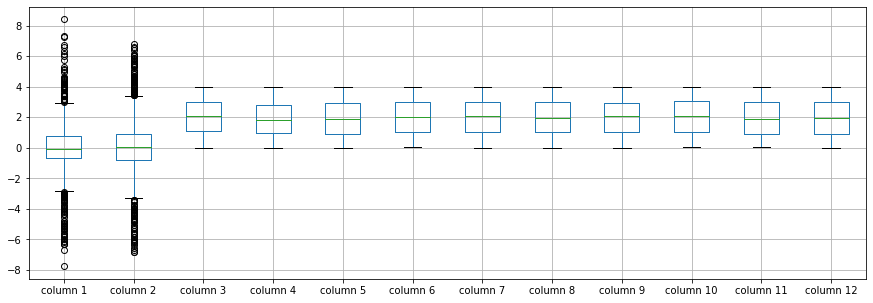

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    -0.104681
column 2     0.083537
column 3     2.038989
column 4     1.898090
column 5     1.928817
column 6     1.976990
column 7     2.029687
column 8     1.975056
column 9     1.974967
column 10    2.031265
column 11    1.968718
column 12    1.960103
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,0.023446,-0.038685,-0.080602,0.014058,-0.009895,-0.006304,0.029790,-0.009627,0.039378,0.077304,-0.027722
column 2,0.023446,1.000000,-0.043552,0.035929,-0.079746,-0.089404,0.022343,-0.027872,-0.024167,0.007894,-0.040189,0.064805
column 3,-0.038685,-0.043552,1.000000,0.023856,-0.017730,-0.064086,-0.087236,0.060381,0.115557,-0.020418,-0.084096,0.003289
column 4,-0.080602,0.035929,0.023856,1.000000,-0.012955,0.100738,0.006105,0.086164,0.007699,0.077679,-0.010589,-0.049116
column 5,0.014058,-0.079746,-0.017730,-0.012955,1.000000,0.065867,0.047368,0.008247,0.000384,0.027300,-0.002850,-0.039474
column 6,-0.009895,-0.089404,-0.064086,0.100738,0.065867,1.000000,0.009485,0.056488,0.009870,-0.003495,0.020229,-0.043399
column 7,-0.006304,0.022343,-0.087236,0.006105,0.047368,0.009485,1.000000,-0.032209,0.057540,0.042235,0.008488,-0.053404
column 8,0.029790,-0.027872,0.060381,0.086164,0.008247,0.056488,-0.032209,1.000000,0.060944,-0.140354,-0.047891,-0.018461
column 9,-0.009627,-0.024167,0.115557,0.007699,0.000384,0.009870,0.057540,0.060944,1.000000,0.010759,0.016481,0.047660
column 10,0.039378,0.007894,-0.020418,0.077679,0.027300,-0.003495,0.042235,-0.140354,0.010759,1.000000,0.000800,0.019092


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+25,12+25+25,12+25+25+25,12+25+25+25+25,12+25+25+25+25+25,12+25+25+25+25+25+25,12+25+25+25+25+25+25+25,12+25+25+25+25+25+25,12+25+25+25+25+25,12+25+25+25+25,12+25+25+25,12+25+25,12+25,12], vae_layer = False, seed = 25)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 27.74078872680664
Epoch: 1 , loss: 27.63610221862793
Epoch: 2 , loss: 27.564124908447265
Epoch: 3 , loss: 27.474696884155275
Epoch: 4 , loss: 27.201832733154298
Epoch: 5 , loss: 25.969557571411134
Epoch: 6 , loss: 24.23663040161133
Epoch: 7 , loss: 23.657554702758787
Epoch: 8 , loss: 23.078058395385742
Epoch: 9 , loss: 22.54972541809082
Epoch: 10 , loss: 22.591305770874023
Epoch: 11 , loss: 22.16713768005371
Epoch: 12 , loss: 22.14564758300781
Epoch: 13 , loss: 21.74756362915039
Epoch: 14 , loss: 21.648175888061523
Epoch: 15 , loss: 21.169183502197267
Epoch: 16 , loss: 20.705319290161132
Epoch: 17 , loss: 20.67727325439453
Epoch: 18 , loss: 20.653512649536133
Epoch: 19 , loss: 20.593962173461914
Epoch: 20 , loss: 20.427388305664063
Epoch: 21 , loss: 20.150584869384765
Epoch: 22 , loss: 20.183290634155274
Epoch: 23 , loss: 20.18847999572754
Epoch: 24 , loss: 20.61461250305176
Epoch: 25 , loss: 20.027386

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(400, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    -0.70595
column 2     0.12893
column 3     1.05810
column 4     2.13620
column 5     2.14860
column 6     2.24580
column 7     3.72770
column 8     2.22720
column 9     1.94350
column 10    1.98700
column 11    2.47070
column 12    0.36826
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Difdoug.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,0.0,2.065598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(13.493905853932382, 163.27447192538312)

In [17]:
NRMS=numerator/denominator
NRMS


0.0826455335902059

In [18]:
new_df.iloc[66,:]

column 1     0.82272
column 2     0.26776
column 3     0.40343
column 4     1.18720
column 5     3.95660
column 6     2.58300
column 7     2.83060
column 8     3.07420
column 9     1.53810
column 10    0.24620
column 11    0.85334
column 12    3.60440
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.97890,1.83630,2.88660,2.46960,0.21541,3.09000,0.78343,0.51035,0.03043,0.100660
1,0.029389,0.206580,0.48861,1.43430,3.12990,1.27780,1.42850,0.14333,1.19480,2.13180,0.98473,3.844500
2,-1.115400,0.217560,1.61050,1.33710,3.76820,1.21000,3.99630,2.21730,3.90290,1.51440,2.43890,0.633580
3,-0.539160,-0.061874,0.36486,0.33278,0.19027,0.56716,1.66010,2.35270,0.66126,3.13510,3.93810,3.734600
4,-0.268400,-1.006000,2.88220,1.56160,3.20140,3.37740,1.52260,0.98475,3.10940,3.65640,3.91720,0.947060
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.72580,3.70480,0.88269,0.35406,1.62780,3.29400,1.08500,0.15740,0.46504,2.851400
396,0.264630,-6.107600,3.90540,1.33770,1.41870,1.68610,1.09510,3.79360,0.12790,0.54249,3.36580,3.755600
397,-3.479100,0.072298,1.32480,1.77210,2.55090,1.47010,0.92540,1.84110,3.47730,0.95496,1.52630,2.123800
398,7.293000,-0.411470,2.49480,0.39655,2.99900,3.41010,2.95160,0.27800,0.99059,3.43740,1.81620,0.087212


In [20]:
imputations[-1].to_excel("Difdoug_NL_1(imp).xlsx", index=False, header=False)